# 结果可视化
+ 每个模型我们都能得到4个文件: train_loss, train_acc, test_loss, test_acc
+ 这里我们将其可视化

In [1]:
import matplotlib.pyplot as plt

In [2]:
# 可视化数据集, file_names is a list
def vis_acc(file_names):
    fig,ax = plt.subplots() 
    plt.xlabel('Iterations')  
    ax.set_xlim([0,100000])  
    ax.set_ylim([0.5,1])
    for file_name in file_names:
        curr_x = []
        curr_y = []
        count = 0
        with open(file_name, 'r') as f:
            for record in f.readlines():
                if count % 5 == 0:
                    curr_x.append(100 * count)
                    curr_y.append(float(record))
                # curr_x.append(100 * count)
                # curr_y.append(float(record))
                count += 1
        plt.plot(curr_x ,curr_y, label = file_name[:-4])
    plt.legend(loc='upper right')
    plt.show()

In [3]:
# 可视化数据集, file_names is a list
def vis_loss(file_names):
    fig,ax = plt.subplots() 
    plt.xlabel('Iterations')  
    ax.set_xlim([0,100000])  
    ax.set_ylim([0,5])
    for file_name in file_names:
        curr_x = []
        curr_y = []
        count = 0
        with open(file_name, 'r') as f:
            for record in f.readlines():
                if count % 5 == 0:
                    curr_x.append(100 * count)
                    curr_y.append(float(record))
                # curr_x.append(100 * count)
                # curr_y.append(float(record))
                count += 1
        plt.plot(curr_x ,curr_y, label = file_name[:-4])
    plt.legend(loc='upper right')
    plt.show()

### Compare 1: 004/006
+ 正交初始化, 双向动态LSTM/GRU, 反向outputs
+ 都是双向的情况下, GRU效果比LSTM好很多, LSTM震荡很大, 而且test acc很低

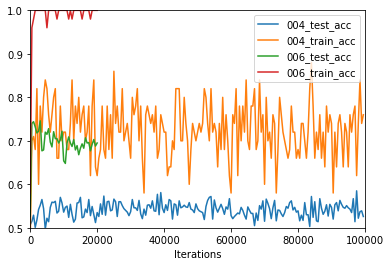

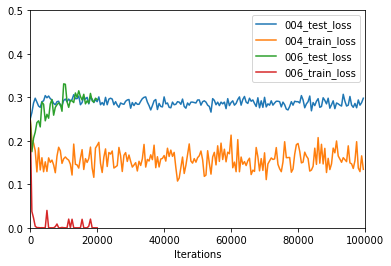

In [10]:
vis_acc(["004_test_acc.txt", "004_train_acc.txt", "006_test_acc.txt", "006_train_acc.txt"])
vis_loss(["004_test_loss.txt", "004_train_loss.txt", "006_test_loss.txt", "006_train_loss.txt"])

### Compare 2: 005/006
+ 正交初始化, 双向动态GRU, 正向/反向outputs
+ 从结果可以看出正反向outputs没什么区别

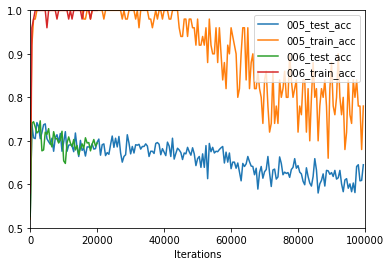

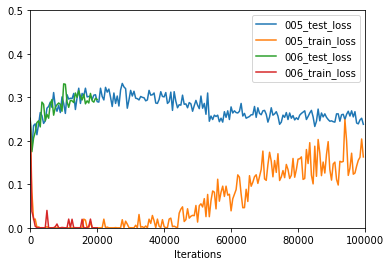

In [7]:
vis_acc(["005_test_acc.txt", "005_train_acc.txt", "006_test_acc.txt", "006_train_acc.txt"])
vis_loss(["005_test_loss.txt", "005_train_loss.txt", "006_test_loss.txt", "006_train_loss.txt"])

### Compare 3: 007/008/009
+ 单向GRU, 更小的lr(0.001), 不同batch(50/25/100)
+ 单向GRU + 100 batch取得了最好的结果, 且准确率远强于之前的双向模型

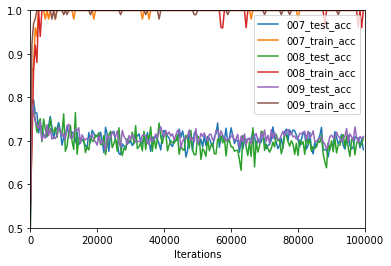

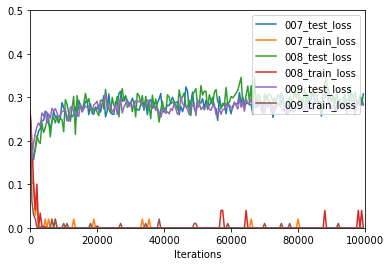

In [11]:
vis_acc(["007_test_acc.txt", "007_train_acc.txt", "008_test_acc.txt", "008_train_acc.txt", "009_test_acc.txt", "009_train_acc.txt"])
vis_loss(["007_test_loss.txt", "007_train_loss.txt", "008_test_loss.txt", "008_train_loss.txt", "009_test_loss.txt", "009_train_loss.txt"])

### Compare 4: 009/010/011 batch(100/125/150)
+ 进一步增大batch测试
+ 单向GRU + 100 batch取得了最好的结果, 且准确率远强于之前的双向模型
+ batch增大到125的效果远强于100, 150和125效果差不多, 之后可以考虑用batch_size = 125

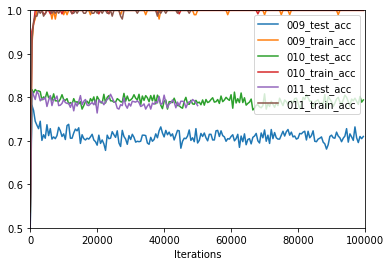

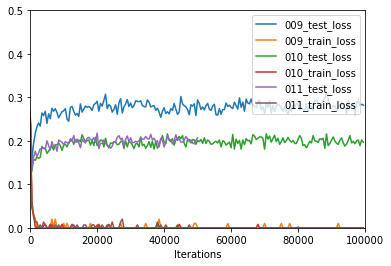

In [5]:
vis_acc(["009_test_acc.txt", "009_train_acc.txt", "010_test_acc.txt", "010_train_acc.txt", "011_test_acc.txt", "011_train_acc.txt"])
vis_loss(["009_test_loss.txt", "009_train_loss.txt", "010_test_loss.txt", "010_train_loss.txt", "011_test_loss.txt", "011_train_loss.txt"])

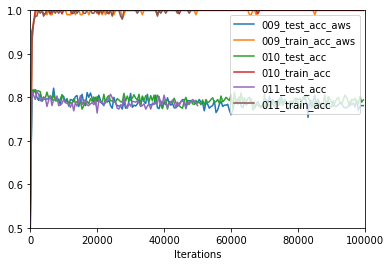

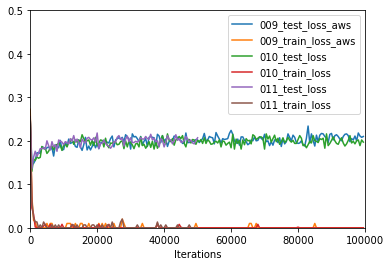

In [5]:
## 都是AWS上的
vis_acc(["009_test_acc_aws.txt", "009_train_acc_aws.txt", "010_test_acc.txt", "010_train_acc.txt", "011_test_acc.txt", "011_train_acc.txt"])
vis_loss(["009_test_loss_aws.txt", "009_train_loss_aws.txt", "010_test_loss.txt", "010_train_loss.txt", "011_test_loss.txt", "011_train_loss.txt"])

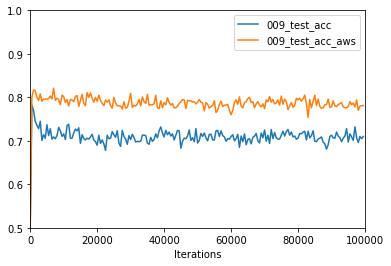

In [6]:
# 不同机器的对比
vis_acc(["009_test_acc.txt", "009_test_acc_aws.txt"])

### Compare 5: 009/012
+ 测试tanh/sigmoid的对比
+ 还是用sigmoid, tanh性能不好

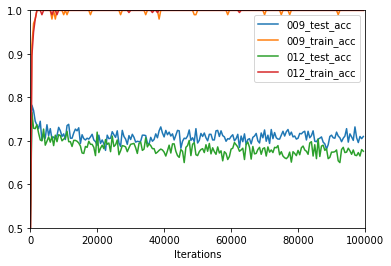

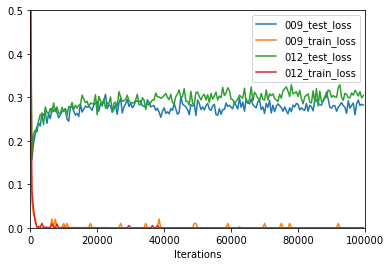

In [6]:
vis_acc(["009_test_acc.txt", "009_train_acc.txt", "012_test_acc.txt", "012_train_acc.txt"])
vis_loss(["009_test_loss.txt", "009_train_loss.txt", "012_test_loss.txt", "012_train_loss.txt"])

### Compare 6: 009/013/014
+ 测试不同dropout: 0.5/0.3/0.7
+ 影响不大, 还是按原来的0.5吧

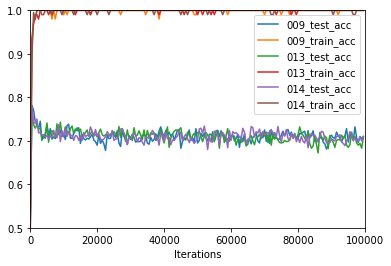

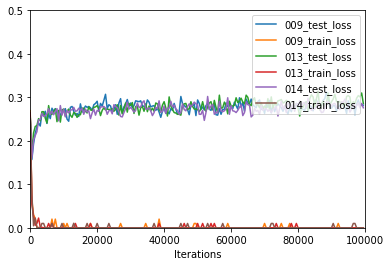

In [4]:
vis_acc(["009_test_acc.txt", "009_train_acc.txt", "013_test_acc.txt", "013_train_acc.txt", "014_test_acc.txt", "014_train_acc.txt"])
vis_loss(["009_test_loss.txt", "009_train_loss.txt", "013_test_loss.txt", "013_train_loss.txt", "014_test_loss.txt", "014_train_loss.txt"])

## Compare 7: 010 / 015 / 016 / 017 / 019
+ 不同的优化器: Adam / Adadelta / Adagrad / SGD / RMSProp
+ 注意由于010(AWS)和其他几个的机器(YS_cpu)不同, 这里019(YS_cpu, XYQ_cpu)再做下对比
+ 看起来还是Adam效果好, 另外我这边的准确率要比杨烁那边高

In [5]:
from glob import glob
xyq_cpu = glob("xyq_cpu_19/*")

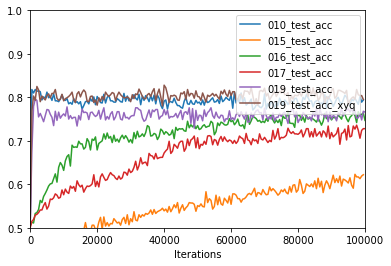

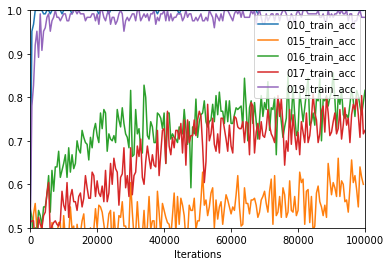

In [11]:
# vis_acc(["010_test_acc.txt", "010_train_acc.txt", "015_test_acc.txt", "015_train_acc.txt", "016_test_acc.txt", "016_train_acc.txt", "017_test_acc.txt", "017_train_acc.txt", "019_test_acc.txt", "019_train_acc.txt"])
# vis_loss(["010_test_loss.txt", "010_train_loss.txt", "015_test_loss.txt", "015_train_loss.txt", "016_test_loss.txt", "016_train_loss.txt", "017_test_loss.txt", "017_train_loss.txt", "019_test_loss.txt", "019_train_loss.txt"])
vis_acc(["010_test_acc.txt", "015_test_acc.txt", "016_test_acc.txt", "017_test_acc.txt", "019_test_acc.txt", "019_test_acc_xyq.txt"])
vis_acc(["010_train_acc.txt", "015_train_acc.txt", "016_train_acc.txt", "017_train_acc.txt", "019_train_acc.txt"])

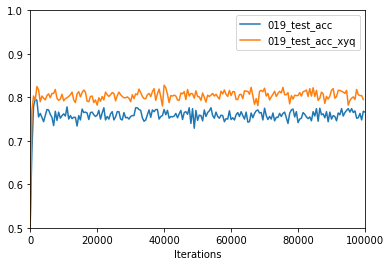

In [10]:
# 不同机器的对比
vis_acc(["019_test_acc.txt", "019_test_acc_xyq.txt"])

### Compare 8: Attention

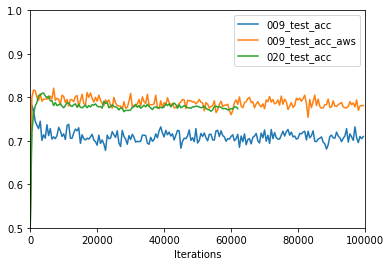

In [4]:
## 都是AWS上的
vis_acc(["009_test_acc_aws.txt", "020_test_acc.txt"])

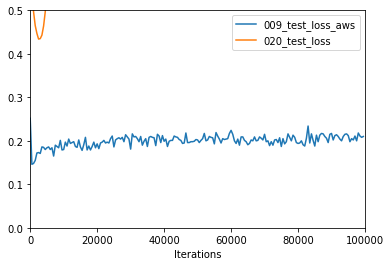

In [5]:
vis_loss(["009_test_loss_aws.txt", "020_test_loss.txt"])

### Compare 9: 最后的比较
+ 双向: 021 - 023 - 025

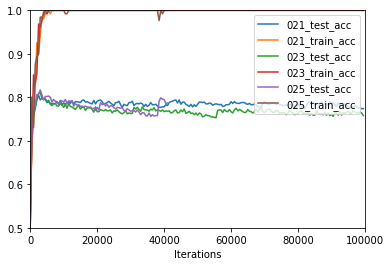

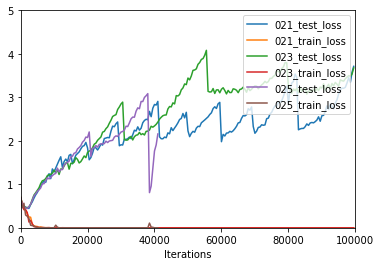

In [6]:
# 021 > 023
vis_acc(["021_test_acc.txt", "021_train_acc.txt", "023_test_acc.txt", "023_train_acc.txt", "025_test_acc.txt", "025_train_acc.txt"])
vis_loss(["021_test_loss.txt", "021_train_loss.txt", "023_test_loss.txt", "023_train_loss.txt", "025_test_loss.txt", "025_train_loss.txt"])

+ 单向: 022 - 024 - 026

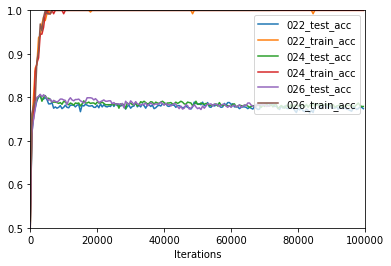

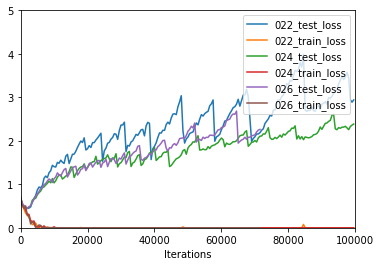

In [7]:
# 024 > 022
vis_acc(["022_test_acc.txt", "022_train_acc.txt", "024_test_acc.txt", "024_train_acc.txt", "026_test_acc.txt", "026_train_acc.txt"]) 
vis_loss(["022_test_loss.txt", "022_train_loss.txt", "024_test_loss.txt", "024_train_loss.txt", "026_test_loss.txt", "026_train_loss.txt"])

+ 021 - 024

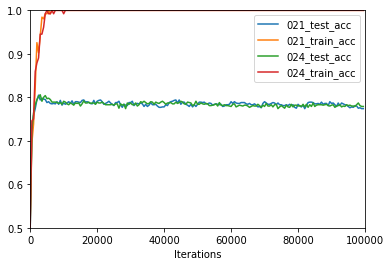

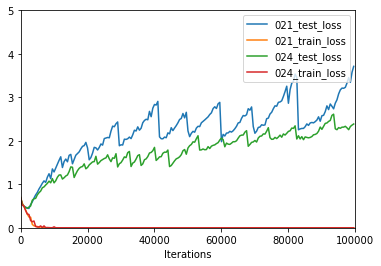

In [12]:
vis_acc(["021_test_acc.txt", "021_train_acc.txt", "024_test_acc.txt", "024_train_acc.txt"]) 
vis_loss(["021_test_loss.txt", "021_train_loss.txt", "024_test_loss.txt", "024_train_loss.txt"])